In [158]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix

from sklearn.metrics import jaccard_score

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

from six import StringIO

import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools


%matplotlib inline

### Importing Data Set

In [159]:
df_mentalhealth=pd.read_csv('survey.csv')

In [160]:
df_mentalhealth

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Data Wrangling

In [161]:
df_mentalhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [162]:
df_mentalhealth.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [163]:
df_mentalhealth.drop('Timestamp', axis=1, inplace=True)

In [164]:
df_mentalhealth.drop('state', axis=1, inplace=True)

In [165]:
df_mentalhealth.drop('comments', axis=1, inplace=True)

In [171]:
df_mentalhealth.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [172]:
df_mentalhealth.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [173]:
mode_self_employed=df_mentalhealth.self_employed.mode()[0]

In [174]:
df_mentalhealth.self_employed.fillna(mode_self_employed, inplace=True)

In [175]:
mode_work_interfere=df_mentalhealth.work_interfere.mode()[0]

In [176]:
df_mentalhealth.work_interfere.fillna(mode_work_interfere, inplace=True)

In [177]:
df_mentalhealth.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [178]:
gender = df_mentalhealth['Gender'].str.lower()

In [179]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]

In [180]:
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [181]:
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]   

In [182]:
for (row, col) in df_mentalhealth.iterrows():

    if str.lower(col.Gender) in male_str:
        df_mentalhealth['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df_mentalhealth['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df_mentalhealth['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [185]:
stk_list = ['A little about you', 'p']
df_mentalhealth = df_mentalhealth[~df_mentalhealth['Gender'].isin(stk_list)]

In [186]:
print(df_mentalhealth['Gender'].unique())

['female' 'male' 'trans']


In [187]:
df_mentalhealth['Age'].fillna(df_mentalhealth['Age'].median(), inplace = True)

In [188]:
s = pd.Series(df_mentalhealth['Age'])
s[s<18] = df_mentalhealth['Age'].median()
df_mentalhealth['Age'] = s
s = pd.Series(df_mentalhealth['Age'])
s[s>120] = df_mentalhealth['Age'].median()
df_mentalhealth['Age'] = s

In [189]:
df_mentalhealth['age_range'] = pd.cut(df_mentalhealth['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [214]:
df_mentalhealth

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,treatment_rate
0,19,0,44,0,0,1,1,4,0,1,...,1,1,1,2,1,0,2,0,2,1
1,26,1,44,0,0,0,2,5,0,0,...,0,1,0,0,1,1,0,0,2,0
2,14,1,6,0,0,0,2,4,0,1,...,1,1,2,2,2,2,1,0,2,0
3,13,1,43,0,1,1,1,2,0,1,...,2,2,1,0,0,0,1,1,2,1
4,13,1,44,0,0,0,0,1,1,1,...,1,1,1,2,2,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,43,0,0,1,3,2,0,1,...,1,1,1,1,1,1,0,0,1,1
1255,14,1,44,0,1,1,1,2,1,1,...,1,1,1,2,1,1,2,0,2,1
1256,16,1,44,0,1,1,3,5,0,1,...,2,2,0,0,1,1,1,0,2,1
1257,28,0,44,0,0,0,3,1,1,1,...,2,1,0,0,1,1,1,0,2,0


### Exploratory Data Analysis

In [190]:
df_mentalhealth.seek_help.value_counts(normalize=True)

No            0.513922
Don't know    0.288783
Yes           0.197295
Name: seek_help, dtype: float64

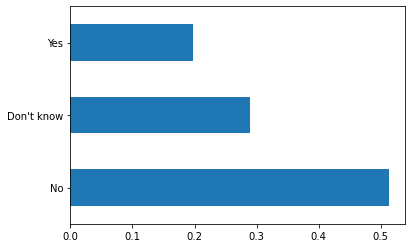

In [135]:
df_mentalhealth.seek_help.value_counts(normalize=True).plot.barh()

In [191]:
df_mentalhealth.mental_health_consequence.value_counts(normalize=True)

No       0.389817
Maybe    0.379475
Yes      0.230708
Name: mental_health_consequence, dtype: float64

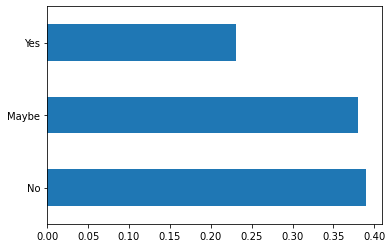

In [192]:
df_mentalhealth.mental_health_consequence.value_counts(normalize=True).plot.barh()

In [193]:
df_mentalhealth.treatment.value_counts(normalize=True)

Yes    0.505171
No     0.494829
Name: treatment, dtype: float64

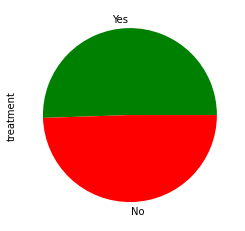

In [194]:
df_mentalhealth.treatment.value_counts(normalize=True).plot.pie(colors=['green', 'red'])

In [195]:
df_mentalhealth.Gender.value_counts(normalize=True)

male      0.788385
female    0.196500
trans     0.015115
Name: Gender, dtype: float64

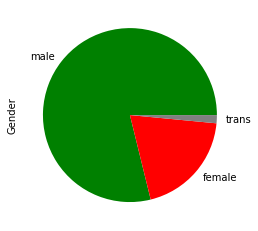

In [196]:
df_mentalhealth.Gender.value_counts(normalize=True).plot.pie(colors=['green', 'red', 'grey'])

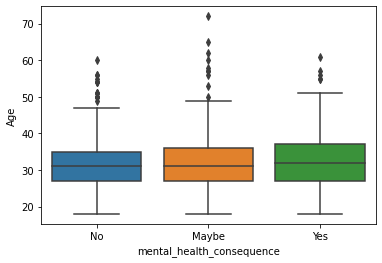

In [197]:
sns.boxplot(x="mental_health_consequence", y="Age", data=df_mentalhealth)

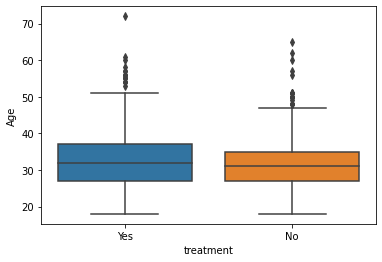

In [198]:
sns.boxplot(x="treatment", y="Age", data=df_mentalhealth)

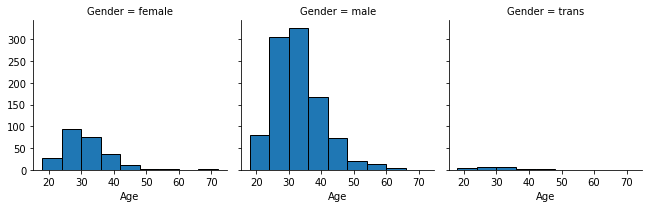

In [199]:
bins = np.linspace(df_mentalhealth.Age.min(), df_mentalhealth.Age.max(), 10)
g = sns.FacetGrid(df_mentalhealth, col="Gender", col_wrap=4)
g.map(plt.hist, 'Age', bins=bins, ec="k")

plt.show()

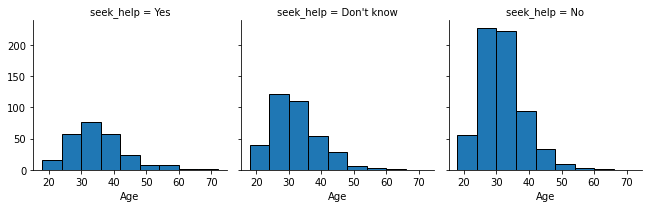

In [200]:
bins = np.linspace(df_mentalhealth.Age.min(), df_mentalhealth.Age.max(), 10)
g = sns.FacetGrid(df_mentalhealth, col="seek_help", col_wrap=4)
g.map(plt.hist, 'Age', bins=bins, ec="k")

plt.show()

In [201]:
df_mentalhealth['treatment_rate'] = np.where(df_mentalhealth.treatment == 'Yes', 1, 0)

In [206]:
df_mentalhealth.treatment_rate.value_counts()

1    635
0    622
Name: treatment_rate, dtype: int64

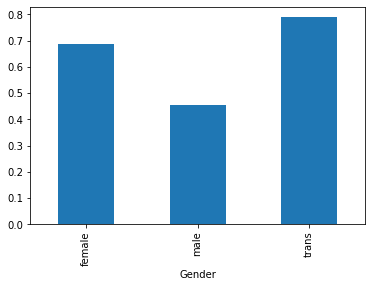

In [207]:
df_mentalhealth.groupby('Gender')['treatment_rate'].mean().plot.bar()

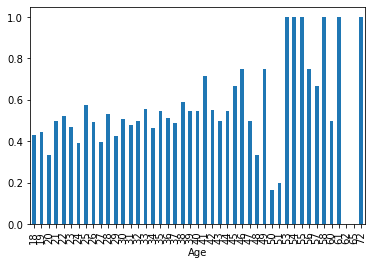

In [208]:
df_mentalhealth.groupby('Age')['treatment_rate'].mean().plot.bar()

In [209]:
result = pd.pivot_table(data=df_mentalhealth, index='Gender', columns='Age', values='treatment_rate')

In [210]:
result

Age,18,19,20,21,22,23,24,25,26,27,...,54,55,56,57,58,60,61,62,65,72
Gender,,,,,,,,,,,,,,,,,,,,,
female,1.0,NaN,0.50,0.500000,0.666667,0.666667,0.636364,0.714286,0.666667,0.666667,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
male,0.4,0.375,0.25,0.461538,0.466667,0.400000,0.294118,0.521739,0.415094,0.301887,...,1.0,1.0,1.0,0.666667,1.0,0.5,1.0,0.0,0.0,NaN
trans,0.0,1.000,NaN,1.000000,NaN,0.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


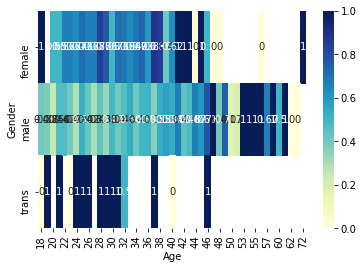

In [211]:
sns.heatmap(result, annot=True, cmap='YlGnBu')

In [212]:
labelDict = {}
for feature in df_mentalhealth:
    le = preprocessing.LabelEncoder()
    le.fit(df_mentalhealth[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df_mentalhealth[feature] = le.transform(df_mentalhealth[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5',

In [213]:
df_mentalhealth.corr()['treatment'].sort_values()

Gender                      -0.149882
no_employees                -0.047733
supervisor                  -0.037944
tech_company                -0.032295
phys_health_consequence     -0.012776
self_employed                0.016264
remote_work                  0.024593
mental_health_consequence    0.027943
phys_health_interview        0.049234
leave                        0.059034
mental_vs_physical           0.060552
age_range                    0.062778
coworkers                    0.066022
Age                          0.072784
Country                      0.080096
seek_help                    0.087700
wellness_program             0.092346
mental_health_interview      0.094859
work_interfere               0.136273
anonymity                    0.140905
obs_consequence              0.154008
benefits                     0.224767
care_options                 0.235135
family_history               0.376714
treatment                    1.000000
treatment_rate               1.000000
Name: treatm

### Feature selection

In [291]:
features =['Gender', 'no_employees', 'phys_health_consequence', 'self_employed', 'remote_work', 'mental_health_consequence', 'phys_health_interview', 'leave', 'mental_vs_physical', 'Age', 'Country', 'seek_help', 'mental_health_interview', 'work_interfere', 'anonymity', 'obs_consequence', 'benefits', 'care_options', 'family_history']
X = df_mentalhealth[features]
y = df_mentalhealth.treatment

### Normalize Data

In [292]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.93642172,  0.69783424,  0.35108963, -0.35969439, -0.65081185,
         0.19399864, -0.9914083 ,  0.39418914,  1.42422183,  0.69304901,
         0.54152278,  1.57920165,  0.30865772, -0.96934976,  1.49395851,
        -0.41146364,  1.13182421,  0.05427092, -0.7992826 ],
       [ 0.42906137,  1.27341012,  0.35108963, -0.35969439, -0.65081185,
        -1.11004571,  0.39325863, -0.93421769, -0.97557286,  1.67156927,
         0.54152278, -1.31446668,  0.30865772, -0.11006016, -0.71145059,
        -0.41146364, -1.25927333, -1.10197556, -0.7992826 ],
       [ 0.42906137,  0.69783424,  0.35108963, -0.35969439, -0.65081185,
         0.19399864,  1.77792556, -0.27001427,  0.22432448, -0.00589403,
        -2.33028548,  0.13236749,  2.66006837, -0.11006016, -0.71145059,
        -0.41146364, -0.06372456, -1.10197556, -0.7992826 ],
       [ 0.42906137, -0.45331752,  2.41333104, -0.35969439, -0.65081185,
         1.49804299, -0.9914083 , -0.27001427,  0.22432448, -0.14568264,
         0.465

In [293]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1005, 19) (1005,)
Test set: (252, 19) (252,)


### K Nearest Neighbor (KNN)

In [294]:
k = 6

neighK6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK6

yhat = neighK6.predict(X_test)

print("Train set Accuracy1: ", metrics.accuracy_score(y_train, neighK6.predict(X_train)))
print("Test set Accuracy1: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy1:  0.7502487562189055
Test set Accuracy1:  0.7222222222222222


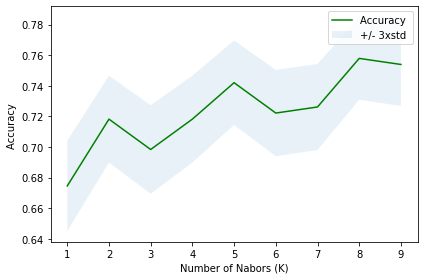

The best accuracy was with 0.7579365079365079 with k= 8


In [295]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];

for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### Decision Tree

In [296]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
bestTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
bestTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [298]:
bestTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [436]:
predTree = bestTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt
       
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


[0 0 1 1 1]
726    0
121    0
550    0
411    1
585    0
Name: treatment, dtype: int64
DecisionTrees's Accuracy:  0.7195767195767195


### Support Vector Machine

In [437]:
df_mentalhealth.dtypes
df = df_mentalhealth[pd.to_numeric(df_mentalhealth['treatment'], errors='coerce').notnull()]
df_mentalhealth['treatment'] = df_mentalhealth['treatment'].astype('int')
df_mentalhealth.dtypes

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [438]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 0, 1, 0])

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       125
           1       0.69      0.72      0.71       127

    accuracy                           0.70       252
   macro avg       0.70      0.70      0.70       252
weighted avg       0.70      0.70      0.70       252

Confusion matrix, without normalization
[[85 40]
 [36 91]]


0.6982986551903171

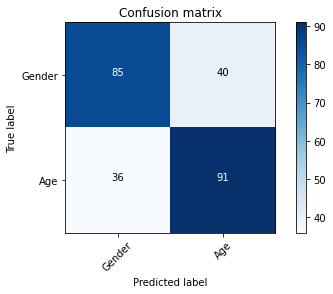

In [439]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])

    
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Gender','Age'],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhat, average='weighted')


### Logistic Regression

In [440]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Train set: (1005, 19) (1005,)
Test set: (252, 19) (252,)


In [445]:
from sklearn.metrics import log_loss
print(log_loss(y_test, yhat_prob))

0.6034375137624355


In [447]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
Y = df_mentalhealth['treatment'].values
Y[0:5]

array([1, 0, 0, 1, 0])

In [451]:
yhatKNN=neigh.predict(X)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )


yhatDEC = bestTree.predict(X)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )


yhatSVM=clf.predict(X)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score: %.2f" % SVMF1)


yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)

print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)

Avg F1-score: 0.74
Avg F1-score: 0.77
Avg F1-score: 0.80
LogLoss: : 0.58
Avg F1-score: 0.7175


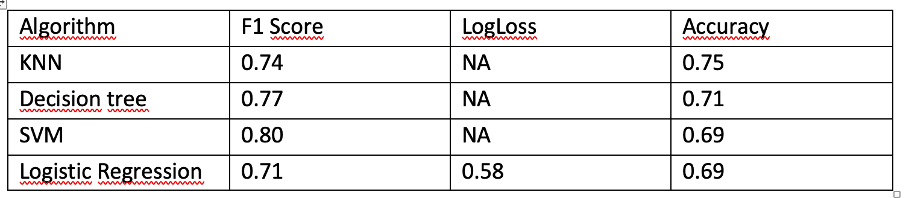